# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    #Linear regression scatter plot for Northern Hemisphere: Temperature (C) vs. Latitude (5 points)
    #units metric per homework line above
    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bazarak
Processing Record 2 of Set 1 | shambu
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | la cruz
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | puerto baquerizo moreno
Processing Record 14 of Set 1 | kristiansund
Processing Record 15 of Set 1 | arica
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | maubara
City not found. Skipping...
Processing Record 18 of Set 1 | banjarmasin
Processing Record 19 of Set 1 | canico
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | margaret 

Processing Record 39 of Set 4 | floro
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | petropavlovka
Processing Record 42 of Set 4 | griffith
Processing Record 43 of Set 4 | hamada
Processing Record 44 of Set 4 | kiffa
Processing Record 45 of Set 4 | cabedelo
Processing Record 46 of Set 4 | yanchep
Processing Record 47 of Set 4 | lensk
Processing Record 48 of Set 4 | tsiombe
Processing Record 49 of Set 4 | tura
Processing Record 0 of Set 5 | oued zem
Processing Record 1 of Set 5 | bam
Processing Record 2 of Set 5 | lanciano
Processing Record 3 of Set 5 | pico truncado
Processing Record 4 of Set 5 | utrik
Processing Record 5 of Set 5 | olonkinbyen
Processing Record 6 of Set 5 | jesus maria
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | huejutla de reyes
Processing Record 9 of Set 5 | avarua
Processing Record 10 of Set 5 | palanpur
Processing Record 11 of Set 5 | santiago
Processing Record 12 of Set 5 | upington
Processing Record 13 of Set

Processing Record 28 of Set 8 | peniche
Processing Record 29 of Set 8 | sofifi
City not found. Skipping...
Processing Record 30 of Set 8 | opuwo
Processing Record 31 of Set 8 | huilong
Processing Record 32 of Set 8 | cassilandia
Processing Record 33 of Set 8 | fuglafjordur
Processing Record 34 of Set 8 | namsos
Processing Record 35 of Set 8 | palikir - national government center
Processing Record 36 of Set 8 | macau
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | arboletes
Processing Record 39 of Set 8 | busselton
Processing Record 40 of Set 8 | greymouth
Processing Record 41 of Set 8 | mejit
Processing Record 42 of Set 8 | hooper
Processing Record 43 of Set 8 | garachico
Processing Record 44 of Set 8 | gorom-gorom
Processing Record 45 of Set 8 | ghat
Processing Record 46 of Set 8 | harstad
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | sur
Processing Record 49 of Set 8 | noosa heads
Processing Record 0 of Set 9 | lupane
Processing R

Processing Record 20 of Set 12 | puerto carreno
Processing Record 21 of Set 12 | khodoriv
Processing Record 22 of Set 12 | tono
Processing Record 23 of Set 12 | olgii
City not found. Skipping...
Processing Record 24 of Set 12 | aketi
Processing Record 25 of Set 12 | nabire
Processing Record 26 of Set 12 | coronel dorrego
Processing Record 27 of Set 12 | piacabucu
Processing Record 28 of Set 12 | nieves
Processing Record 29 of Set 12 | novyy urengoy
Processing Record 30 of Set 12 | cadale
Processing Record 31 of Set 12 | kazerun
Processing Record 32 of Set 12 | otukpa
Processing Record 33 of Set 12 | fontanelas
Processing Record 34 of Set 12 | sena madureira
Processing Record 35 of Set 12 | pudozh
Processing Record 36 of Set 12 | pola de lena
Processing Record 37 of Set 12 | am djarass
City not found. Skipping...
Processing Record 38 of Set 12 | zhuanghe
Processing Record 39 of Set 12 | greenville
Processing Record 40 of Set 12 | nantucket
Processing Record 41 of Set 12 | cam ranh
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bazarak,35.3129,69.5152,5.36,50,100,1.58,AF,1701207880
1,shambu,9.5667,37.1000,10.46,79,16,1.13,ET,1701207880
2,pisco,-13.7000,-76.2167,22.03,73,0,11.83,PE,1701207420
3,la cruz,23.9167,-106.9000,28.26,45,1,5.73,MX,1701207755
4,ushuaia,-54.8000,-68.3000,6.81,81,75,12.35,AR,1701207403


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bazarak,35.3129,69.5152,5.36,50,100,1.58,AF,1701207880
1,shambu,9.5667,37.1000,10.46,79,16,1.13,ET,1701207880
2,pisco,-13.7000,-76.2167,22.03,73,0,11.83,PE,1701207420
3,la cruz,23.9167,-106.9000,28.26,45,1,5.73,MX,1701207755
4,ushuaia,-54.8000,-68.3000,6.81,81,75,12.35,AR,1701207403


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

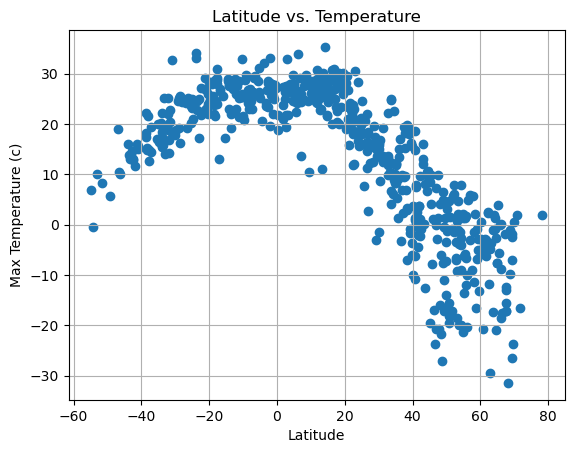

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(lat, temp)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

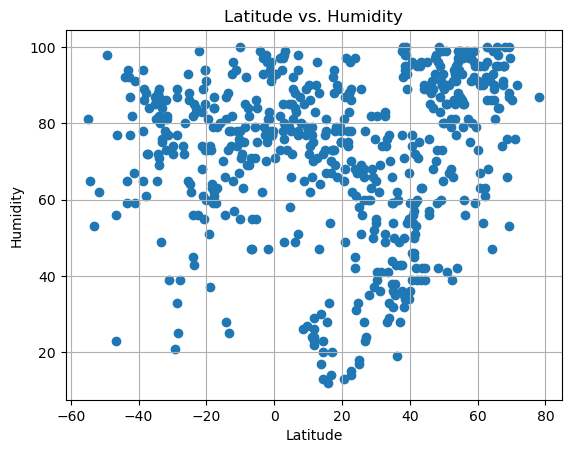

In [9]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
hum = city_data_df["Humidity"]

plt.scatter(lat, hum)
# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

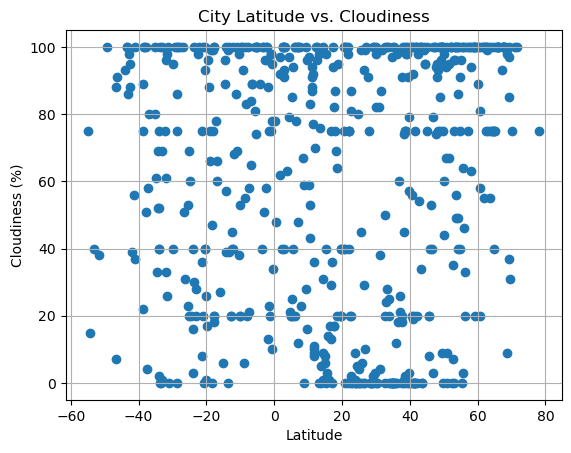

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
clo = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(lat, clo)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

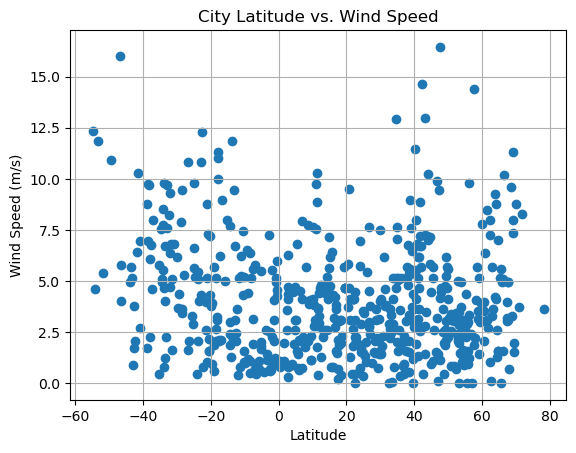

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat, wind)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bazarak,35.3129,69.5152,5.36,50,100,1.58,AF,1701207880
1,shambu,9.5667,37.1000,10.46,79,16,1.13,ET,1701207880
3,la cruz,23.9167,-106.9000,28.26,45,1,5.73,MX,1701207755
7,georgetown,5.4112,100.3354,25.96,89,20,1.54,MY,1701207430
8,talnakh,69.4865,88.3972,-23.70,97,31,1.94,RU,1701207421


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,pisco,-13.7000,-76.2167,22.03,73,0,11.83,PE,1701207420
4,ushuaia,-54.8000,-68.3000,6.81,81,75,12.35,AR,1701207403
5,blackmans bay,-43.0167,147.3167,14.07,94,86,0.89,AU,1701207418
6,adamstown,-25.0660,-130.1015,23.12,86,69,6.62,PN,1701207395
11,atafu village,-8.5421,-172.5159,26.67,85,100,6.38,TK,1701207410


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7190630542859673


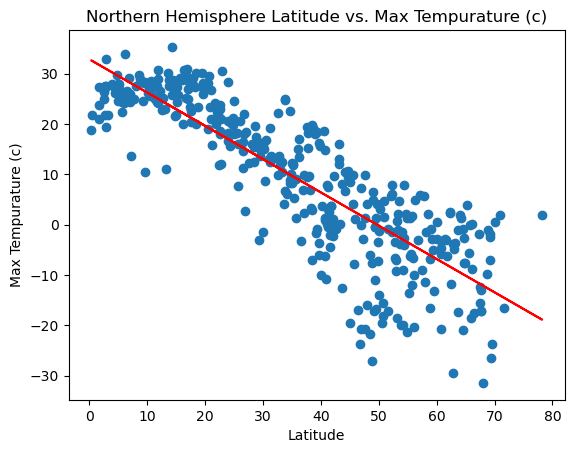

In [15]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Max Tempurature (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5694902303376556


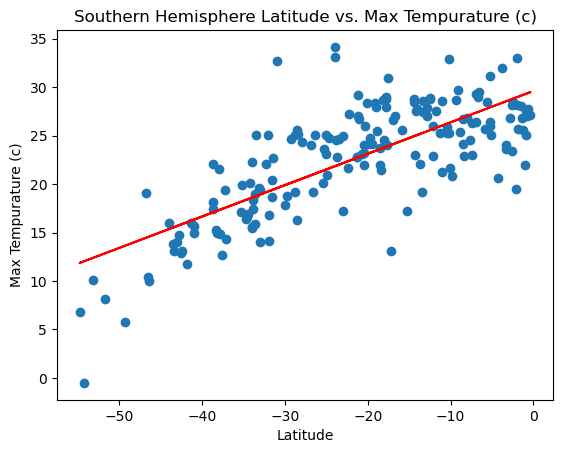

In [16]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
temp = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Max Tempurature (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (c)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship: As you move away from the equator in both the northern and southren hemosphere the colder you will get. The nothern one is getting colder than the southern one right now because of the seasons they are in.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2720376915480345


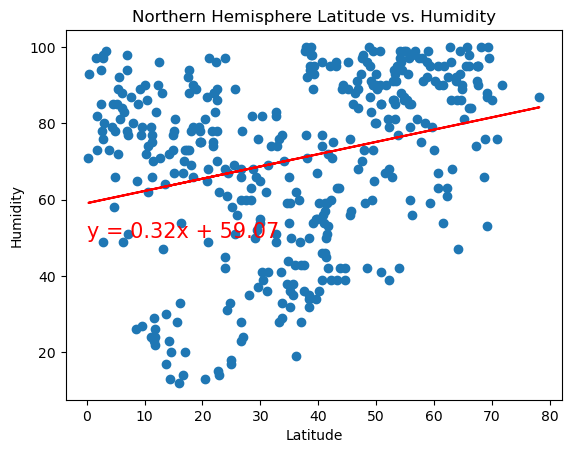

In [17]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
hum = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.07872035613434385


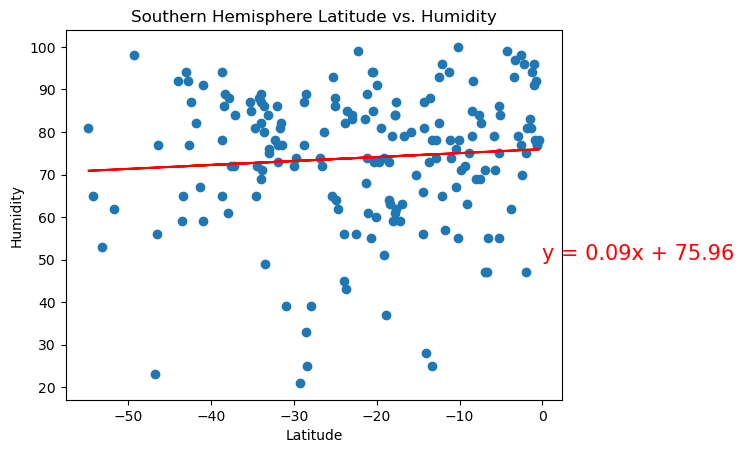

In [18]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
hum = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is very little if anything at all that shows Latitude vs humidity this could be becuase the amount of water around doesnt play a role into the latidude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05334597892601338


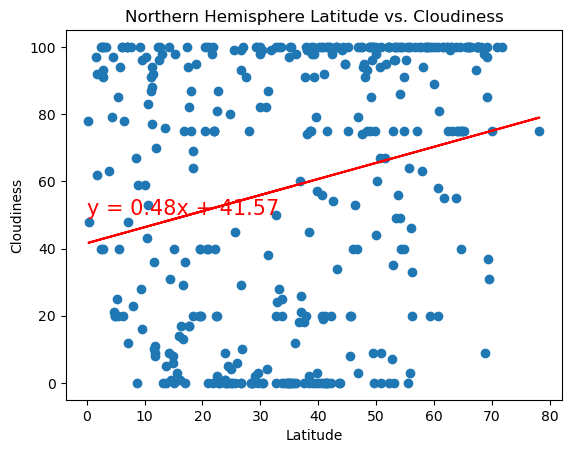

In [19]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
clo = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, clo)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, clo)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.002830028524335609


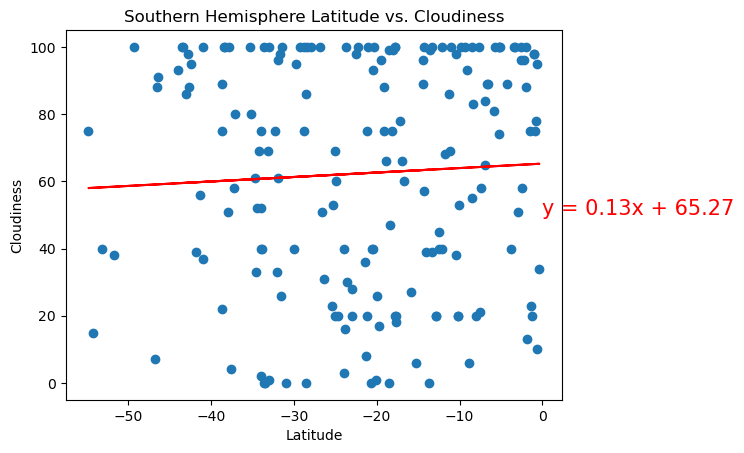

In [20]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
clo = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, clo)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, clo)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

# **Discussion about the linear relationship:** How cloudy it is isnt effect by the latidue  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13280185465862615


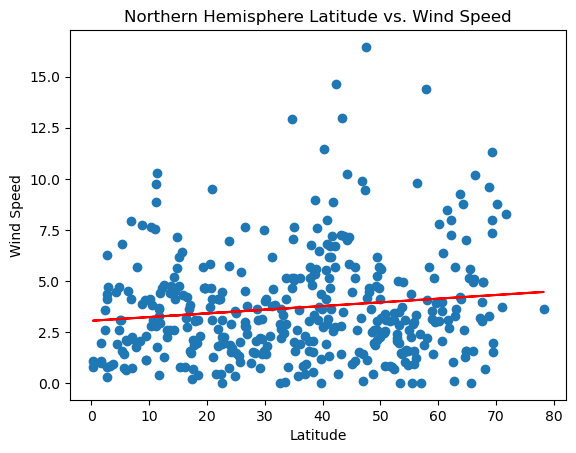

In [21]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
wind = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3941259920541613


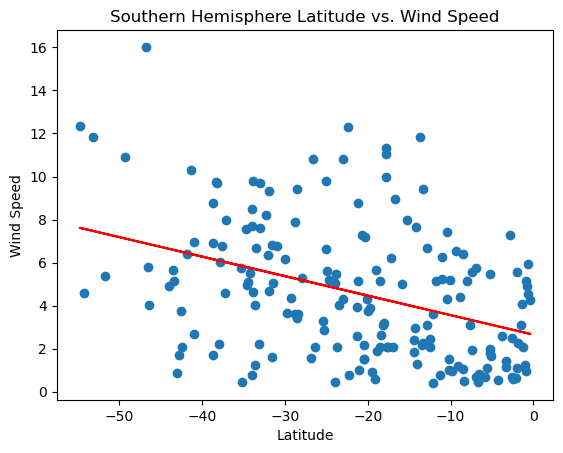

In [22]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
wind = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** How fast the wind is isnt effect by the latidude 
